In [39]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.spatial import distance

In [40]:
def jensen_shannon_distance(production_col: pd.DataFrame, baseline_col: pd.DataFrame) -> float:
    """Compute data drift using Jensen-Shannon Distance for each feature.

    Args:
        production_col: DataFrame column from production dataset provided by user.
        baseline_col: DataFrame column from baseline dataset provided by user.

    Returns:
        float: The Jensen-Shannon distances between production and baseline column

    """
    values_per_column = list(set(baseline_col.unique()) | set(production_col.unique()))
    current_frequencies = np.array([production_col.to_list().count(value) for value in values_per_column])
    reference_frequencies = np.array([baseline_col.to_list().count(value) for value in values_per_column])
    current_ratios = current_frequencies / np.sum(current_frequencies)
    reference_ratios = reference_frequencies / np.sum(reference_frequencies)
    return distance.jensenshannon(current_ratios, reference_ratios)

In [41]:
observations = 10_000
x = pd.Series(np.random.normal(50, 15, observations)) # reference
w = pd.Series(np.random.normal(50, 15, observations)) # identical with x

In [42]:
print("Jensen-Shannon Distance:", jensen_shannon_distance(x, w))

Jensen-Shannon Distance: 0.8325546111576977


<AxesSubplot:>

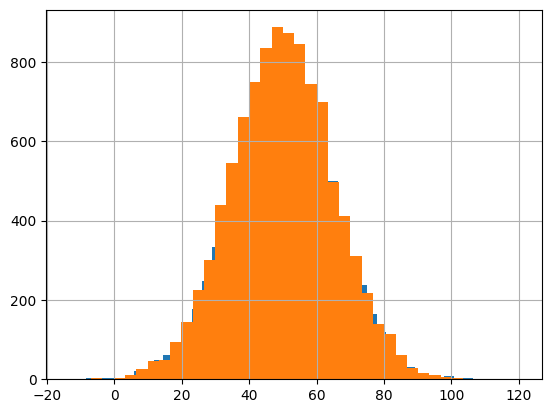

In [45]:
x.hist(bins=40)
w.hist(bins=40)